# Titanic Dataset Analysis: Descriptive Statistics, Data Cleaning, and Visualization

**Created By:** Mohamed Atwan

For any contributions or questions, connect with us on [LinkedIn](https://www.linkedin.com/in/mohamed-atwan-7aaa81223/).


# Introduction

Welcome to the Titanic competition analysis notebook. This notebook aims to provide a comprehensive analysis of the Titanic dataset, which is used in the Kaggle competition to predict survival rates of passengers.

## Overview of the Titanic Dataset

The Titanic dataset contains information about the passengers aboard the Titanic, including features such as:
- **PassengerId**: Unique ID for each passenger
- **Pclass**: Passenger class (1st, 2nd, or 3rd)
- **Name**: Name of the passenger
- **Sex**: Gender of the passenger
- **Age**: Age of the passenger
- **SibSp**: Number of siblings or spouses aboard
- **Parch**: Number of parents or children aboard
- **Ticket**: Ticket number
- **Fare**: Fare paid by the passenger
- **Cabin**: Cabin number
- **Embarked**: Port of Embarkation (C = Cherbourg, Q = Queenstown, S = Southampton)

## Objective of the Analysis

The primary objective of this notebook is to:
- Explore and clean the dataset
- Perform descriptive statistics and visualization
- Analyze factors affecting survival rates
- Extract insights to guide further modeling efforts

By the end of this analysis, we aim to understand the relationships between different features and survival, and prepare the data for predictive modeling.

Let's get started!


# Data Loading

In this section, we will load the Titanic dataset into Pandas DataFrames. This will allow us to explore and analyze the data.

**Loading the Data**

We will use the `pandas` library to read the CSV files containing the training and test datasets. Make sure you have the dataset files available at the specified paths.

Make Sure That You Install Pandas With `pip install pandas`

In [1]:
import pandas as pd

# Load the training and test datasets
train_df = pd.read_csv('./train.csv')
test_df = pd.read_csv('./test.csv')

**In the code above:**

We import the `pandas` library.

We use `pd.read\_csv()` to load the training and test datasets into DataFrames **(train\_df and test\_df)**.

Make sure to replace **/path/to/train.csv** and **/path/to/test.csv** with the actual paths to your dataset files.

**Next Steps**

**Once the data is loaded, we will explore its structure and content to better understand what we're working with. Let's move on to the data exploration phase.**

# Data Exploration

In this section, we will explore the Titanic dataset to understand its structure and content. <br>
This involves :
- viewing the initial rows
- checking the shape
- examining data types
- examining missing values & Duplicates.
- And Finally Getting Data Summary

## Viewing the initial rows
To get an initial look at the data, we will display the first few rows of the training dataset.

In [2]:
# Display the first few rows of the training dataset
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


**In the code above:**

`train_df.head()`: Displays the first 5 rows of the training dataset. 

**This allows us to preview the data and understand its structure, including column names and data types.**

## checking the shape
To understand the dimensions of the dataset, we will check the number of rows and columns.

In [3]:
# Check the shape of the training dataset
train_df.shape

(891, 12)

**In the code above:**

`train_df.shape`: Returns a tuple representing the number of rows and columns in the dataset. 

**This helps us gauge the dataset's size and structure.**

## Examining data types
We will examine the data types of each column to ensure that they are appropriate for the analysis.

**Method 1**

In [4]:
train_df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

**In the code above:**

`train_df.dtypes`: Displays the data types of each column. 

**This is important for understanding how each feature is represented and whether any type conversions are needed.**

**Method 2**

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**In the code above:**

`train_df.info()`: This method provides a concise summary of the DataFrame, including:
- The number of entries (rows) in the DataFrame.
- The column names.
- The data type of each column (e.g., integer, float, object).
- The number of non-null entries in each column, which is helpful for identifying columns with missing data.
- The memory usage of the DataFrame.

**This method is useful for getting a quick overview of the dataset's structure, especially to spot any issues like unexpected data types or columns with a significant number of missing values.**

## Examining missing values & Duplicates.

### Missing Values
Identifying and handling missing values is crucial for data quality. We will check for missing values in the dataset.

In [6]:
# Check for missing values in the training dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**In the code above:**

`train_df.isnull().sum()`: Calculates the number of missing values for each column. 

**This helps us identify which columns have missing data and may need imputation or other handling.**

### Duplicate Rows
We should also check for and handle any duplicate rows in the dataset.

In [7]:
# Check for duplicate rows in the training dataset
train_df.duplicated().sum()

0

**In the code above:**

`train_df.duplicated().sum()`: Counts the number of duplicate rows in the dataset. 

**Duplicate rows can affect the results of our analysis, so identifying and removing them is essential.**

## Data Summary
Summarizing the dataset provides insights into the distribution and central tendencies of numerical features, as well as the frequency of categorical features.

### Numerical Features Summary

In [8]:
# Generate summary statistics for numerical features
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**In the code above:**

`train_df.describe()`: Provides summary statistics (mean, standard deviation, min, max, and quartiles) for numerical features. 

**This helps us understand the range and distribution of numeric data.**

### Categorical Features Distribution

In [9]:
# Display value counts for categorical features {Pclass, Sex, Embarked}
print(train_df['Pclass'].value_counts())
print('-'*30)
print(train_df['Sex'].value_counts())
print('-'*30)
print(train_df['Embarked'].value_counts())

Pclass
3    491
1    216
2    184
Name: count, dtype: int64
------------------------------
Sex
male      577
female    314
Name: count, dtype: int64
------------------------------
Embarked
S    644
C    168
Q     77
Name: count, dtype: int64


**In the code above:**

`train_df['Pclass'].value_counts()`: Shows the count of unique values in the 'Pclass' column.
`train_df['Sex'].value_counts()`: Shows the count of unique values in the 'Sex' column.
`train_df['Embarked'].value_counts()`: Shows the count of unique values in the 'Embarked' column

**These methods help us understand the distribution of categorical features and identify any imbalances or trends.**

### Categorical Features Unique Values
Understanding the unique values for categorical features reveals the variety and distribution within the data

**Unique Values for Categorical Features**

In [10]:
# Unique values and frequency for 'Pclass'
print("Unique values for 'Pclass':")
print(train_df['Pclass'].unique())
print('-'*30)

# Unique values and frequency for 'Sex'
print("Unique values for 'Sex':")
print(train_df['Sex'].unique())
print('-'*30)

# Unique values and frequency for 'Embarked'
print("Unique values for 'Embarked':")
print(train_df['Embarked'].unique())

Unique values for 'Pclass':
[3 1 2]
------------------------------
Unique values for 'Sex':
['male' 'female']
------------------------------
Unique values for 'Embarked':
['S' 'C' 'Q' nan]


**In the code above:**

- `train_df['Pclass'].unique()`: Lists unique values in the 'Pclass' column.
- `train_df['Sex'].unique()`: Lists unique values in the 'Sex' column.
- `train_df['Embarked'].unique()`: Lists unique values in the 'Embarked' column.

**These methods help us understand the categorical feature's variability and distribution.**

## Summary
**In this section, we have:**

- Displayed the first few rows of the dataset to understand its initial structure.
- Checked the shape to know the number of rows and columns.
- Examined data types to ensure they are correct.
- Identified missing values to address data quality issues.
- Checked for duplicate rows to ensure the dataset's integrity.
- Generated summary statistics and explored categorical feature distributions.
- Explored feature value counts and unique values.

**These steps help us understand the dataset's structure, quality, and key characteristics, laying the groundwork for data cleaning and feature engineering.**


## Next Steps

**With a comprehensive understanding of the dataset, we will proceed to data cleaning to handle missing values, duplicates, and inconsistencies**

# Data Cleaning

Data cleaning is essential for ensuring that our analysis is accurate.

In this section, we'll clean the dataset to ensure it's ready for analysis and modeling. 
Data cleaning involves:

- Handle missing values
- Check for and remove duplicate rows
- Ensure data consistency and correctness
- correcting data types
- Addressing any inconsistencies or errors.

## Handling Missing Values

**We will identify and handle missing values in the dataset. Depending on the feature and its importance, we can either remove rows with missing values or fill them using an appropriate method (e.g., mean, median, mode, or a specific value).**

### Identifying Missing Values

First, let's identify which columns contain missing values and how many are missing in each. This will help us decide how to handle them.

In [11]:
# Check for missing values in the training dataset
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

**In the code above:**

`train_df.isnull().sum()`: This code calculates the number of missing values for each column in the DataFrame. 

**Identifying missing values is crucial as it informs us about potential gaps in our dataset that need to be addressed before further analysis.**

### Handling Missing Values

Once we've identified the missing values, we need to decide how to handle them. Depending on the importance of the feature and the amount of data missing, we might either drop these values or fill them with an appropriate value.

**Filling Missing Values**
- For categorical columns like `Embarked`, we'll fill missing values with the `mode (most frequent value)`.
- For numerical columns like `Age`, we can use the `median`.

In [12]:
# Fill missing values for 'Embarked' with the mode
train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)

# Fill missing values for 'Age' with the median
train_df['Age'].fillna(train_df['Age'].median(), inplace=True)

/tmp/ipykernel_173125/1164141328.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)
/tmp/ipykernel_173125/1164141328.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].metho

**In the code above:**

`train_df['Embarked'].fillna(train_df['Embarked'].mode()[0], inplace=True)`: 
Fills missing values in the 'Embarked' column with the most frequent value. 

**This is appropriate for categorical data where using the mode is often a good choice.**

---------------------------------------------------------------------

`train_df['Age'].fillna(train_df['Age'].median(), inplace=True)`: 
Fills missing values in the 'Age' column with the median value. 

**The median is robust against outliers and is a good measure of central tendency for numerical data**

### Dropping Irrelevant or Redundant Columns
Sometimes, certain columns may not be relevant to the analysis or might have too many missing values to be useful. In such cases, we can drop these columns.

In [13]:
# Drop the 'Cabin' column due to a high percentage of missing values
train_df.drop(columns=['Name', 'Ticket', 'Cabin'], inplace=True)

**In the code above:**

`train_df.drop(columns=['Cabin'], inplace=True)`: 
Drops the 'Cabin' column from the dataset. 

**This is often necessary when a column has too many missing values, making it unfit for reliable analysis.**

## Checking for and Removing Duplicate Rows
Duplicate rows can skew the analysis, so we must check for and remove any duplicates.

In [14]:
# Check for duplicate rows
print("Number of duplicate rows:", train_df.duplicated().sum())

Number of duplicate rows: 0


In [15]:
# Remove duplicate rows if any
train_df.drop_duplicates(inplace=True)

**In the code above:**

`train_df.duplicated().sum()`: Checks the DataFrame for duplicate rows and returns the count. 

**Duplicate data can lead to misleading results, so it's important to remove them.**
______________________
`train_df.drop_duplicates(inplace=True)`: Removes any duplicate rows from the DataFrame. 

**This ensures that each row in the dataset is unique and contributes meaningfully to the analysis.**

## Ensuring Data Consistency and Correctness
We must ensure that all features have the correct data types for analysis and modeling. We might need to convert some columns from one type to another.

In [16]:
# Convert 'Pclass' to a categorical type
train_df['Pclass'] = train_df['Pclass'].astype('category')

# Convert 'Survived' to a categorical type
train_df['Sex'] = train_df['Sex'].astype('category')

# Convert 'Survived' to a categorical type
train_df['Embarked'] = train_df['Embarked'].astype('category')

# Convert 'Survived' to a categorical type
train_df['Survived'] = train_df['Survived'].astype('category')

**In the code above:**

`train_df['Column_Name'] = train_df['Column_Name'].astype('category')`:

Converts the `[Pclass, Sex, Embarked, Survived]` columns to a categorical type, 

**as it represents distinct classes rather than continuous numerical values or Object One.**

## Verifying the Cleaning Process

After handling missing values, dropping irrelevant columns, and ensuring data consistency, it's important to verify that the dataset is now clean and ready for further analysis.

In [17]:
# Display the DataFrame information after cleaning
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   PassengerId  891 non-null    int64   
 1   Survived     891 non-null    category
 2   Pclass       891 non-null    category
 3   Sex          891 non-null    category
 4   Age          891 non-null    float64 
 5   SibSp        891 non-null    int64   
 6   Parch        891 non-null    int64   
 7   Fare         891 non-null    float64 
 8   Embarked     891 non-null    category
dtypes: category(4), float64(2), int64(3)
memory usage: 38.9 KB


In [18]:
train_df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.0,1,0,7.2500,S
1,2,1,1,female,38.0,1,0,71.2833,C
2,3,1,3,female,26.0,0,0,7.9250,S
3,4,1,1,female,35.0,1,0,53.1000,S
4,5,0,3,male,35.0,0,0,8.0500,S


In [19]:
train_df.nunique()

PassengerId    891
Survived         2
Pclass           3
Sex              2
Age             88
SibSp            7
Parch            7
Fare           248
Embarked         3
dtype: int64

# Descriptive Statistics

This section provides a summary of the dataset, helping us understand the basic properties and distribution of the data.

Descriptive statistics offer a comprehensive overview of the dataset by summarizing its main characteristics. 

This includes measures of central tendency, dispersion, and the distribution of variables.

- Calculate Summary Statistics
- Understand Data Distribution
- Explore Relationships Between Variables
- Visualize Descriptive Statistics

## Calculate Summary Statistics
Summary statistics provide a quick overview of each feature’s distribution and central tendency.

### Summary Statistics for Numerical Features
We use pandas to compute various statistics like mean, median, standard deviation, and percentiles.

In [20]:
# Summary statistics for numerical features
train_df.describe()

,PassengerId,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,29.361582,0.523008,0.381594,32.204208
std,257.353842,13.019697,1.102743,0.806057,49.693429
min,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,35.000000,1.000000,0.000000,31.000000
max,891.000000,80.000000,8.000000,6.000000,512.329200


**In the code above:**

`train_df.describe()`: Computes summary statistics for numerical features, including count, mean, standard deviation, minimum, quartiles, and maximum values. 

**This helps in understanding the central tendency and dispersion of numerical features.**

### Summary Statistics for Categorical Features
For categorical features, we calculate frequency counts and mode.

In [21]:
# Summary statistics for categorical features
train_df.describe(include=['object', 'category'])

,Survived,Pclass,Sex,Embarked
count,891,891,891,891
unique,2,3,2,3
top,0,3,male,S
freq,549,491,577,646


**In the code above:**

`train_df.describe(include=['object', 'category'])`: 

Computes summary statistics for categorical features, including count, unique values, top value, and frequency. 

**This provides insights into the distribution of categorical variables.**

## Understand Data Distribution
Understanding the distribution of data helps in identifying patterns and anomalies.

### Visualizing Data Distribution
Histograms and box plots are useful for visualizing the distribution of numerical features.

#### Histogram for Age
Pandas provides a straightforward way to plot histograms.

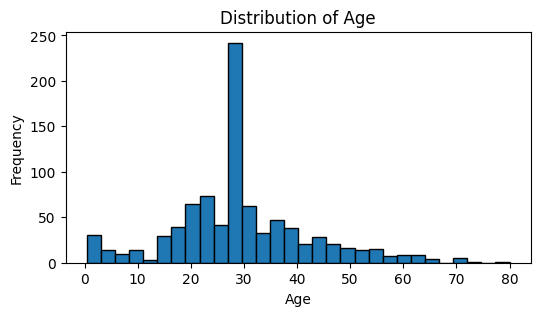

In [22]:
import matplotlib.pyplot as plt
# Histogram for 'Age'
train_df['Age'].plot(kind='hist', bins=30, edgecolor='black', figsize=(6, 3))

# Info On THe Plot
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

**In the code above:**

`train_df['Age'].plot(kind='hist', bins=30, edgecolor='black')`: 

Creates a histogram for the 'Age' column with 30 bins and black edges for better visibility.
______
`plt.title, plt.xlabel, plt.ylabel`: Adds a title and labels to the plot.

#### Box Plot for Fare
Pandas can also generate box plots.

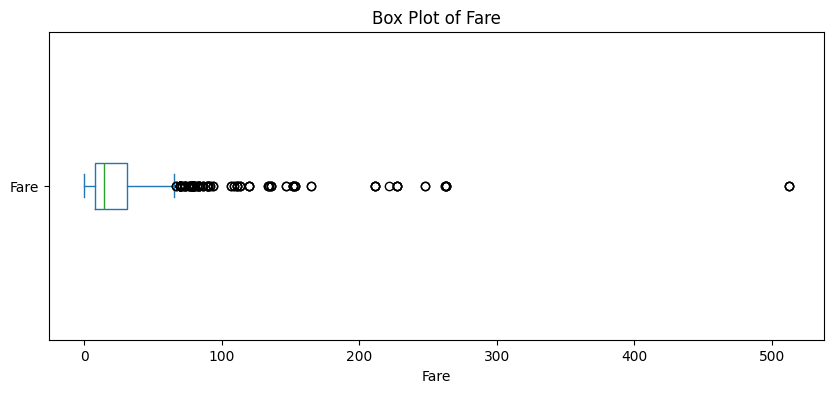

In [23]:
# Box plot for 'Fare'
train_df['Fare'].plot(kind='box', vert=False, figsize=(10, 4))

# Info On THe Plot
plt.title('Box Plot of Fare')
plt.xlabel('Fare')
plt.show()


**In the code above:**

`train_df['Fare'].plot(kind='box', vert=False, figsize=(10, 4))`:

Creates a box plot for the 'Fare' column. 

**The box plot shows the median, quartiles, and potential outliers.**

#### Box Plot of Age by Pclass
Pandas supports box plots for categorical data as well.

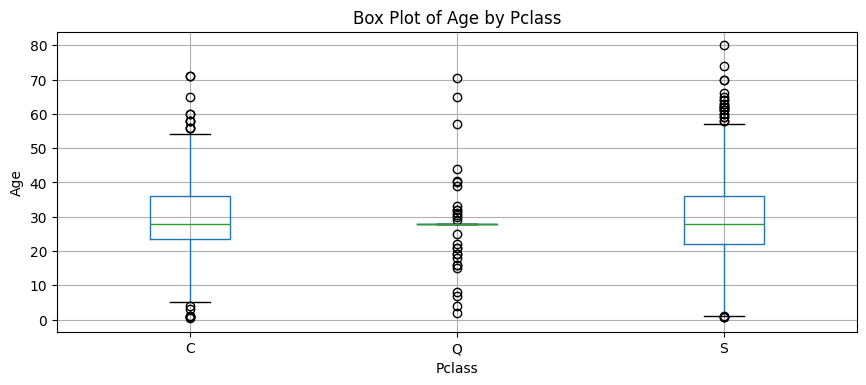

In [24]:
# Box plot of 'Age' by 'Pclass'
train_df.boxplot(column='Age', by='Embarked', figsize=(10, 4))

# Info On THe Plot
plt.title('Box Plot of Age by Pclass')
plt.suptitle('')  # Removes the default title to keep only the customized title
plt.xlabel('Pclass')
plt.ylabel('Age')
plt.show()


**In the code above:**

`train_df.boxplot(column='Age', by='Embarked')`: Creates a box plot showing the distribution of 'Age' across different 'Embarked' categories. The by='Embarked' parameter groups the data by 'Pclass'.

## Explore Relationships Between Variables
Examining relationships between features can reveal insights about their interdependencies.

### Correlation Matrix
A correlation matrix helps to understand the linear relationship between numerical features.

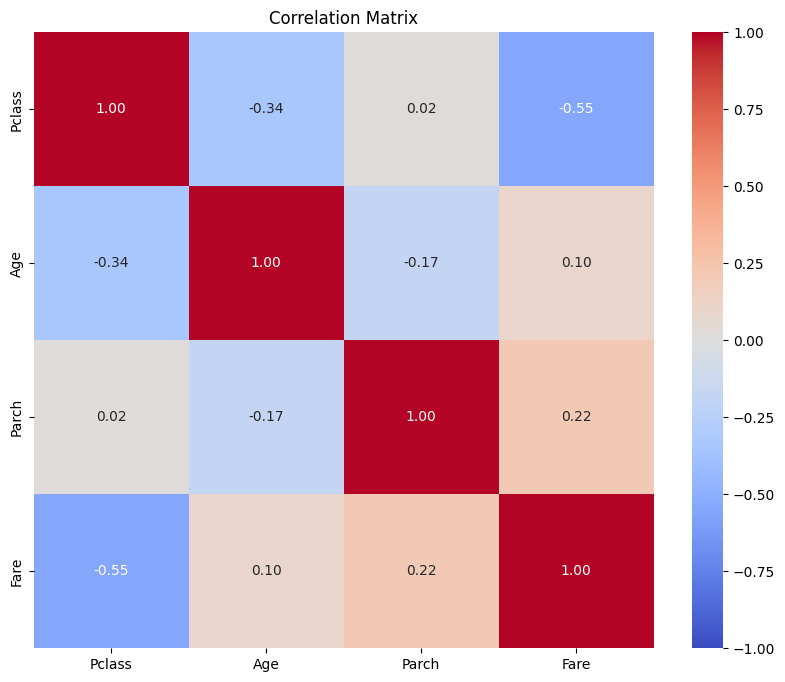

In [25]:
import seaborn as sns
import matplotlib.pyplot as plt

# Compute the correlation matrix
corr = train_df[['Pclass', 'Age', 'Parch', 'Fare']].corr()

# Plot the correlation matrix with annotations
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', vmin=-1, vmax=1, fmt='.2f')

plt.title('Correlation Matrix')
plt.show()

## Visualize Descriptive Statistics
Visualizations enhance the understanding of descriptive statistics.

### Count Plot for Embarked
Displays the distribution of the 'Embarked' variable, showing how many passengers boarded from each port.

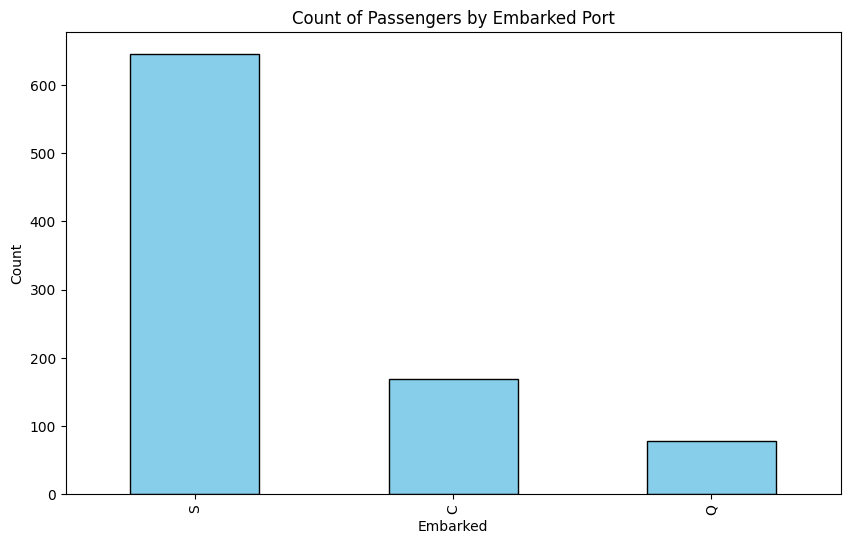

In [26]:
train_df['Embarked'].value_counts().plot(kind='bar', figsize=(10, 6), color='skyblue', edgecolor='black')

plt.title('Count of Passengers by Embarked Port')
plt.xlabel('Embarked')
plt.ylabel('Count')
plt.show()

### Count Plot for Sex
Shows the number of male and female passengers.

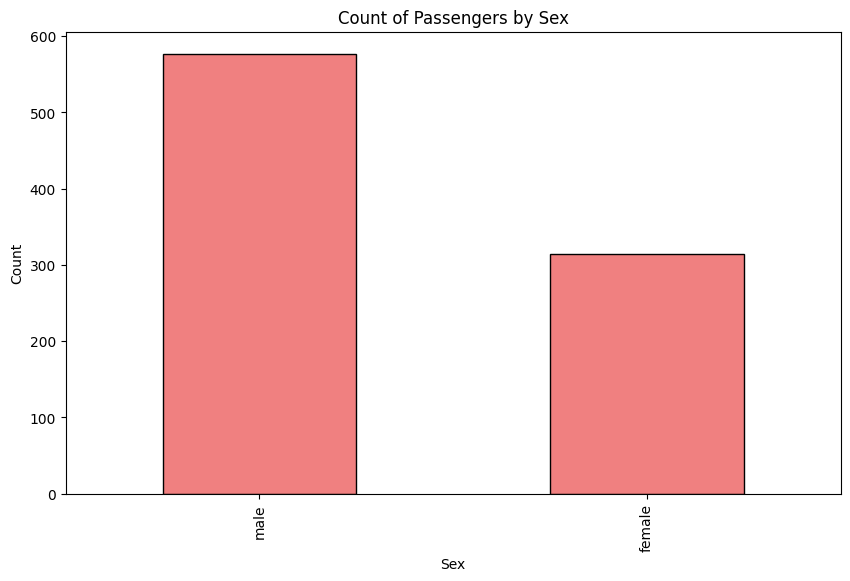

In [27]:
train_df['Sex'].value_counts().plot(kind='bar', figsize=(10, 6), color='lightcoral', edgecolor='black')


plt.title('Count of Passengers by Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.show()

### Count Plot for Pclass
Displays the number of passengers in each class.

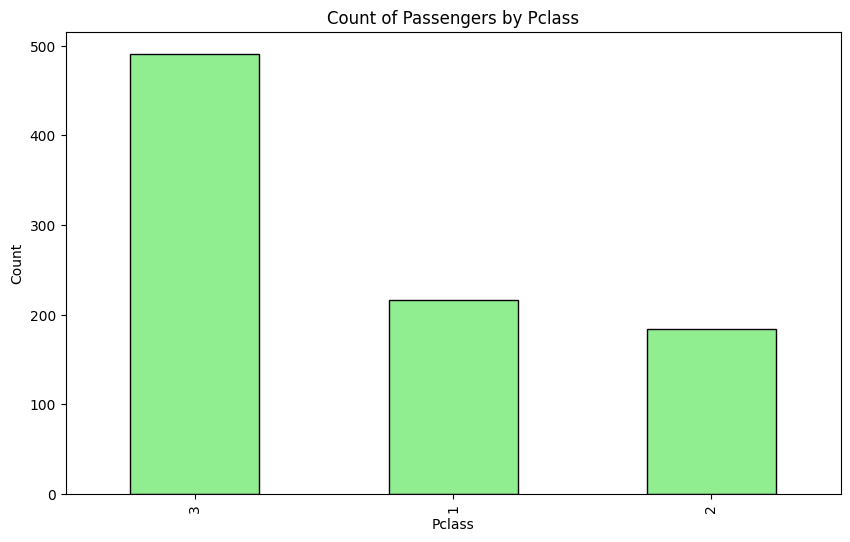

In [28]:
train_df['Pclass'].value_counts().plot(kind='bar', figsize=(10, 6), color='lightgreen', edgecolor='black')


plt.title('Count of Passengers by Pclass')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.show()

### Count Plot for SibSp (Siblings/Spouses)
Shows the number of passengers with different numbers of siblings or spouses aboard.

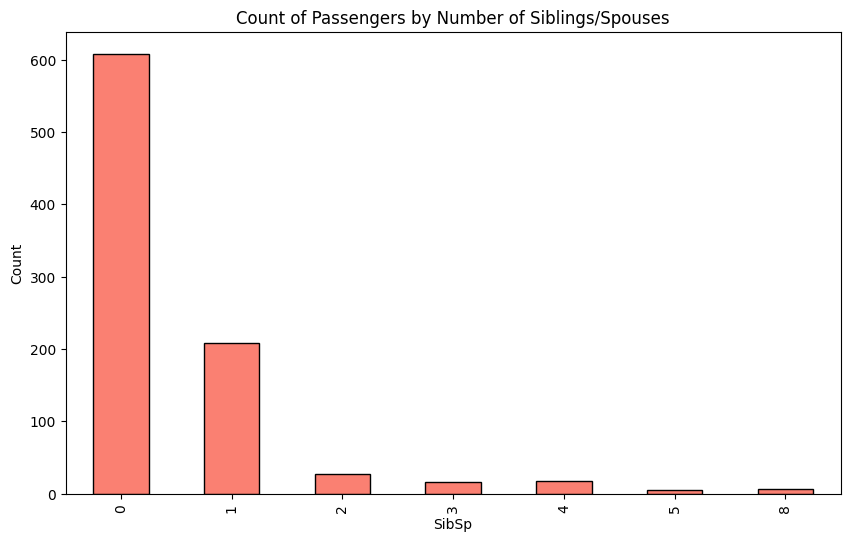

In [29]:
train_df['SibSp'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='salmon', edgecolor='black')

plt.title('Count of Passengers by Number of Siblings/Spouses')
plt.xlabel('SibSp')
plt.ylabel('Count')
plt.show()

### Count Plot for Parch (Parents/Children)
Displays the number of passengers with different numbers of parents or children aboard.

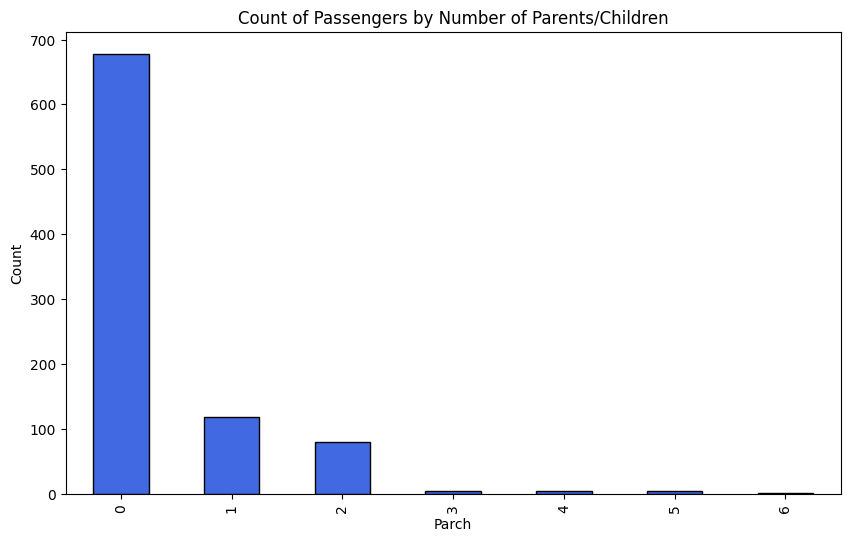

In [30]:
train_df['Parch'].value_counts().sort_index().plot(kind='bar', figsize=(10, 6), color='royalblue', edgecolor='black')

plt.title('Count of Passengers by Number of Parents/Children')
plt.xlabel('Parch')
plt.ylabel('Count')
plt.show()

### Combined Count Plot for [ Pclass, Sex , Embarked ] and Survived
This plot will visualize the count of passengers in each class who survived or did not survive.

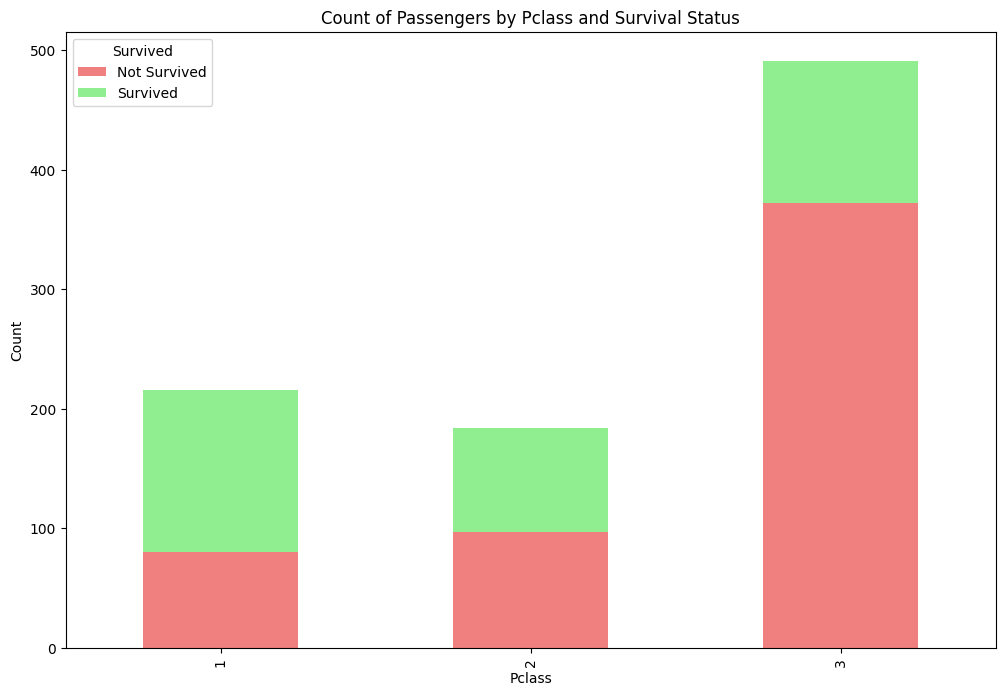

In [31]:
pd.crosstab(train_df['Pclass'], train_df['Survived']).plot(kind='bar', figsize=(12, 8), stacked=True, color=['lightcoral', 'lightgreen'])

plt.title('Count of Passengers by Pclass and Survival Status')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

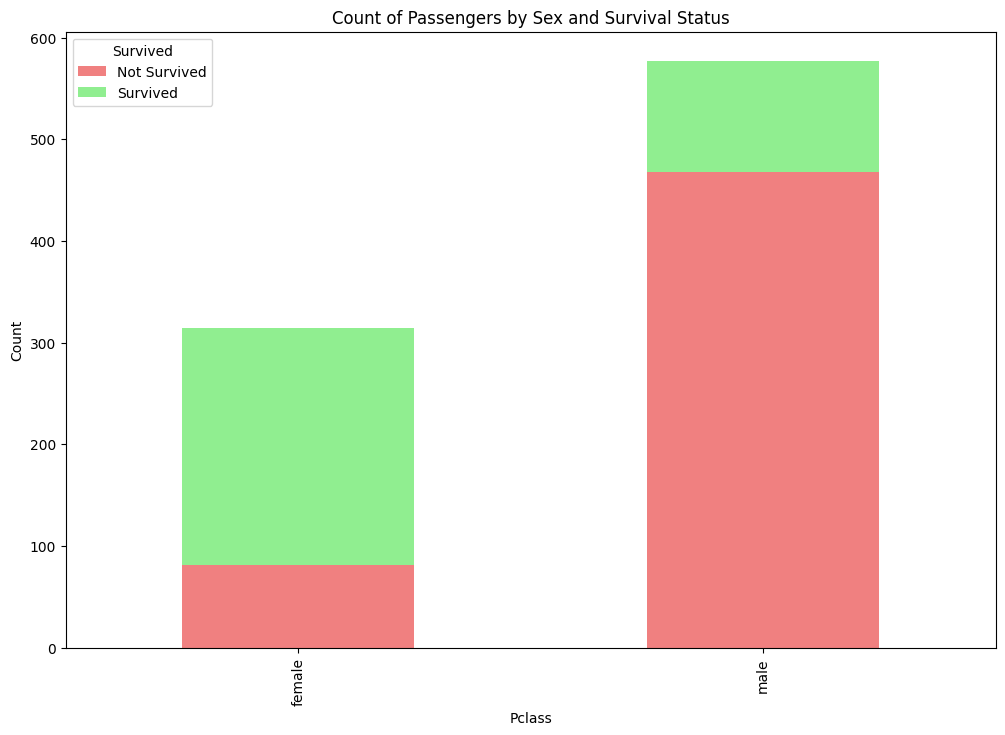

In [32]:
pd.crosstab(train_df['Sex'], train_df['Survived']).plot(kind='bar', figsize=(12, 8), stacked=True, color=['lightcoral', 'lightgreen'])

plt.title('Count of Passengers by Sex and Survival Status')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

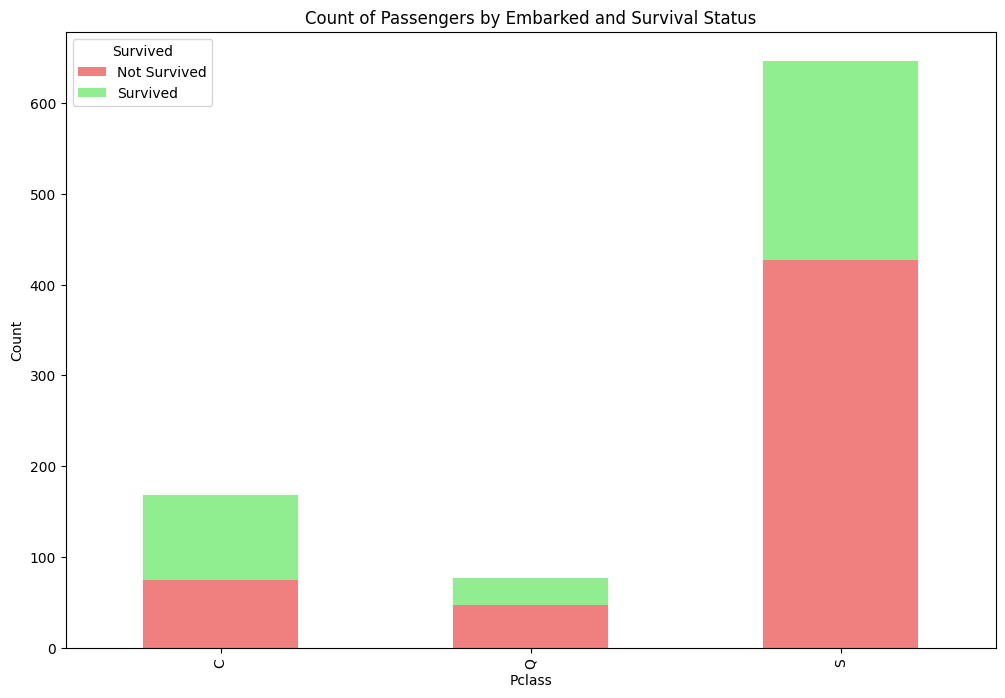

In [33]:
pd.crosstab(train_df['Embarked'], train_df['Survived']).plot(kind='bar', figsize=(12, 8), stacked=True, color=['lightcoral', 'lightgreen'])

plt.title('Count of Passengers by Embarked and Survival Status')
plt.xlabel('Pclass')
plt.ylabel('Count')
plt.legend(title='Survived', labels=['Not Survived', 'Survived'])
plt.show()

### Pie Chart for Survived
Shows the proportion of survivors versus non-survivors.

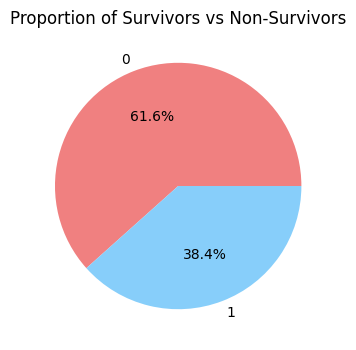

In [34]:
train_df['Survived'].value_counts().plot(kind='pie', autopct='%1.1f%%', figsize=(4, 4), colors=['lightcoral', 'lightskyblue'])

plt.title('Proportion of Survivors vs Non-Survivors')
plt.ylabel('')  # Hide the y-label
plt.show()

### Creating a Pair Plot with Seaborn 

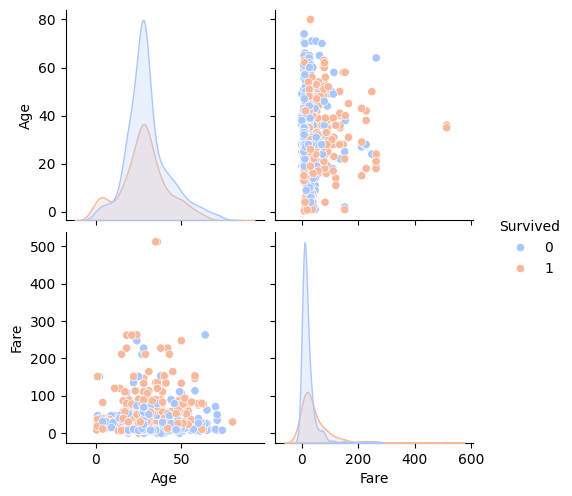

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(train_df[['Age', 'Fare', 'Survived']], hue='Survived', palette='coolwarm')

plt.show()

**In the code above:**

`sns.pairplot(train_df[['Age', 'Fare', 'Survived']], hue='Survived', palette='coolwarm')`: 

Creates a pair plot for the selected features `Age`, `Fare`, and `Survived`. Points are colored based on the `Survived` column using the `coolwarm` color palette.

**This pair plot will help you visualize the relationships between Age, Fare, and Survived, including the distribution of each feature and how they interact with each other.**

###
**These plots will help you gain deeper insights into the dataset by visualizing distributions, relationships, and categorical data. Let me know if you need any more specific plots or explanations!**

**In the code above:**


# Data Analysis Questions and Answers

Here, we will address several key questions related to the dataset:
1. What is the distribution of survival rates by passenger class?
2. How does survival rate vary by age group?
3. What is the survival rate based on the fare paid?
4. Does having a family aboard affect the survival rate?
5. Is there a relationship between the embarked location and survival rate?

We will use the following code to answer these questions:


# Conclusion

In this section, we summarize the key findings from the data analysis and provide insights into the factors that influenced survival rates on the Titanic. We also discuss the implications of these findings and suggest potential areas for further exploration.

#### Key Findings

1. **Passenger Class and Survival Rates:**
   - **Finding:** Survival rates were higher among first-class passengers compared to second and third-class passengers.
   - **Insight:** The higher survival rate for first-class passengers suggests that they had better access to lifeboats and safer evacuation procedures.

2. **Age and Survival Rates:**
   - **Finding:** Survival rates were higher for children and older adults compared to middle-aged passengers.
   - **Insight:** This may reflect the prioritization of children and elderly individuals during the evacuation process.

3. **Fare and Survival Rates:**
   - **Finding:** Passengers who paid higher fares generally had higher survival rates.
   - **Insight:** Higher fares might be correlated with better access to lifeboats and evacuation resources.

4. **Family Size and Survival Rates:**
   - **Finding:** Larger family sizes were associated with lower survival rates.
   - **Insight:** This could indicate that larger groups faced difficulties during evacuation or that prioritization might have affected families.

5. **Embarked Location and Survival Rates:**
   - **Finding:** Survival rates varied by embarkation location, with some locations showing higher survival rates.
   - **Insight:** Differences in survival rates by embarkation point could be due to variations in evacuation procedures or lifeboat availability.

6. **Gender and Survival Rates:**
   - **Finding:** Female passengers had higher survival rates compared to male passengers.
   - **Insight:** This aligns with the "women and children first" policy, which prioritized women and children during evacuation.

7. **Siblings/Spouses and Survival Rates:**
   - **Finding:** The number of siblings/spouses aboard had an impact on survival rates.
   - **Insight:** Similar to family size, the presence of siblings or spouses might have influenced evacuation priorities.

8. **Cabin Location and Survival Rates:**
   - **Finding:** Survival rates varied based on cabin location.
   - **Insight:** Proximity to lifeboats and access routes may have influenced survival chances based on cabin location.

By synthesizing these findings, we gain a clearer understanding of the Titanic dataset and the factors that played a role in determining survival rates. This understanding provides a foundation for further exploration and analysis.

# Next Steps

Based on the insights gained from the analysis, here are the recommended next steps to advance the project:

#### 1. Feature Engineering

**Objective:** Improve the dataset by creating or modifying features to enhance the model's performance.

- **Create New Features:** Develop additional features that might capture relevant patterns in the data. For example, combining features like family size from the number of siblings/spouses and parents/children could provide more context.
- **Transform Existing Features:** Modify existing features to better suit the model. For instance, age could be categorized into different groups (e.g., child, teenager, adult) to simplify the analysis and potentially improve model performance.

#### 2. Data Preprocessing

**Objective:** Prepare the data for modeling by ensuring it is clean, consistent, and formatted appropriately.

- **Handle Missing Values:** Decide on strategies to address missing values, which could involve imputation (e.g., filling missing values with the median or mean) or removing rows with missing data, depending on the significance and amount of missing information.
- **Encode Categorical Variables:** Convert categorical variables into numerical formats that can be used by machine learning algorithms. Techniques such as one-hot encoding or label encoding can be applied based on the nature of the categorical data.
- **Normalize and Standardize Data:** Apply normalization or standardization to numerical features to ensure they are on a consistent scale. This is especially important for models that are sensitive to the scale of the input features.

#### 3. Model Building

**Objective:** Develop and evaluate machine learning models to predict survival rates.

- **Model Selection:** Choose suitable classification models for the prediction task. Options include Logistic Regression, Random Forest, Gradient Boosting, and other machine learning algorithms.
- **Training:** Train the selected models on the preprocessed dataset. This involves fitting the model to the training data to learn the patterns and relationships between the features and the target variable.
- **Evaluation:** Assess model performance using metrics such as accuracy, precision, recall, F1 score, and ROC-AUC. This helps in understanding how well the model performs and in identifying areas for improvement.

#### 4. Further Exploration

**Objective:** Continue to explore the dataset for additional insights and refine the model.

- **Analyze Feature Importance:** Determine which features are most influential in predicting survival. This can help in understanding the key factors affecting survival rates and guide feature selection.
- **Experiment with Different Models:** Try various models and techniques to find the one that offers the best performance. This includes experimenting with hyperparameters, feature combinations, and different modeling approaches.
- **Cross-Validation:** Implement cross-validation techniques to ensure that the model generalizes well to unseen data and is not overfitting to the training data.

By following these steps, you will be able to refine the analysis, improve the dataset, and develop robust predictive models. Each step helps in enhancing the overall quality of the model and provides deeper insights into the factors affecting survival rates.

# THANK YOU